In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [3]:
rand = np.random.RandomState(42)

In [4]:
X =  rand.rand(10,2)

Compute the distance between each pair of points. Recall that the squared-distance between two points is the sum of the squared differences in each dimension.

In [5]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [6]:
# square the coordinate differences
differences_sq = differences ** 2

In [7]:
# sum the coordinate differences to get the squared distance
distance_sq = differences_sq.sum(axis = 2)
distance_sq.shape

(10, 10)

Just to double-check what we are doing, we should see that the diagonal of this matrix (i.e., the set of distances between each point and itself) is all zero

In [8]:
distance_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

We can now use np.argsort to sort along each row. The leftmost columns will then give the indices of the nearest neighbors. Notice that the first column gives the numbers 0 through 9 in order: this is due to the fact that each point's closest neighbor is itself, as we would expect.

In [9]:
nearest = np.argsort(distance_sq, axis = 1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


If we're simply interested in the nearest $k$ neighbors, all we need is to partition each row so that the smallest $k+1$ squared distances come first, with larger distances filling the remaining positions of the array. We can do this with the np.argpartition function

In [10]:
K = 2
nearest_partition = np.argpartition(distance_sq, K + 1, axis = 1)
print(nearest_partition)

[[3 0 4 5 8 9 1 7 2 6]
 [1 4 6 9 3 5 2 7 8 0]
 [2 7 9 8 6 4 5 1 3 0]
 [3 5 0 8 4 1 6 7 2 9]
 [1 4 0 8 9 6 2 7 5 3]
 [5 3 0 8 4 1 6 7 2 9]
 [1 9 6 4 3 5 2 7 8 0]
 [7 2 9 8 6 4 5 1 3 0]
 [8 9 4 7 2 3 0 1 5 6]
 [8 7 9 2 1 6 4 5 3 0]]


Plot the points along with lines representing the connections from each point to its two nearest neighbors

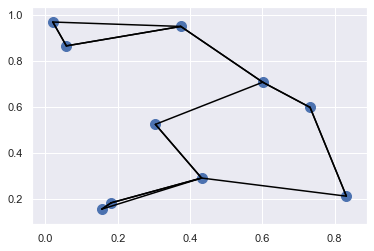

In [11]:
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=100);

for i in range(X.shape[0]):
    for j in nearest_partition[i,:K+1]:
        # plot a line from X[i] to X[j]
        plt.plot(*zip(X[i], X[j]), color='black')